## i/o

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# read excel file
df = pd.read_excel('C:/Users/acc_a/OneDrive/PhOLED 300.xlsx', sheetname='Sheet2')
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(313, 32)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_cathode1,cd/A
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,5.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,4.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,9.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,12.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,8.0


In [3]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0] #check wnumber of null values in column

# np.nonzero(pd.isnull(df.values).any(1)) #check the index of missing value

# drop the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(304, 32)


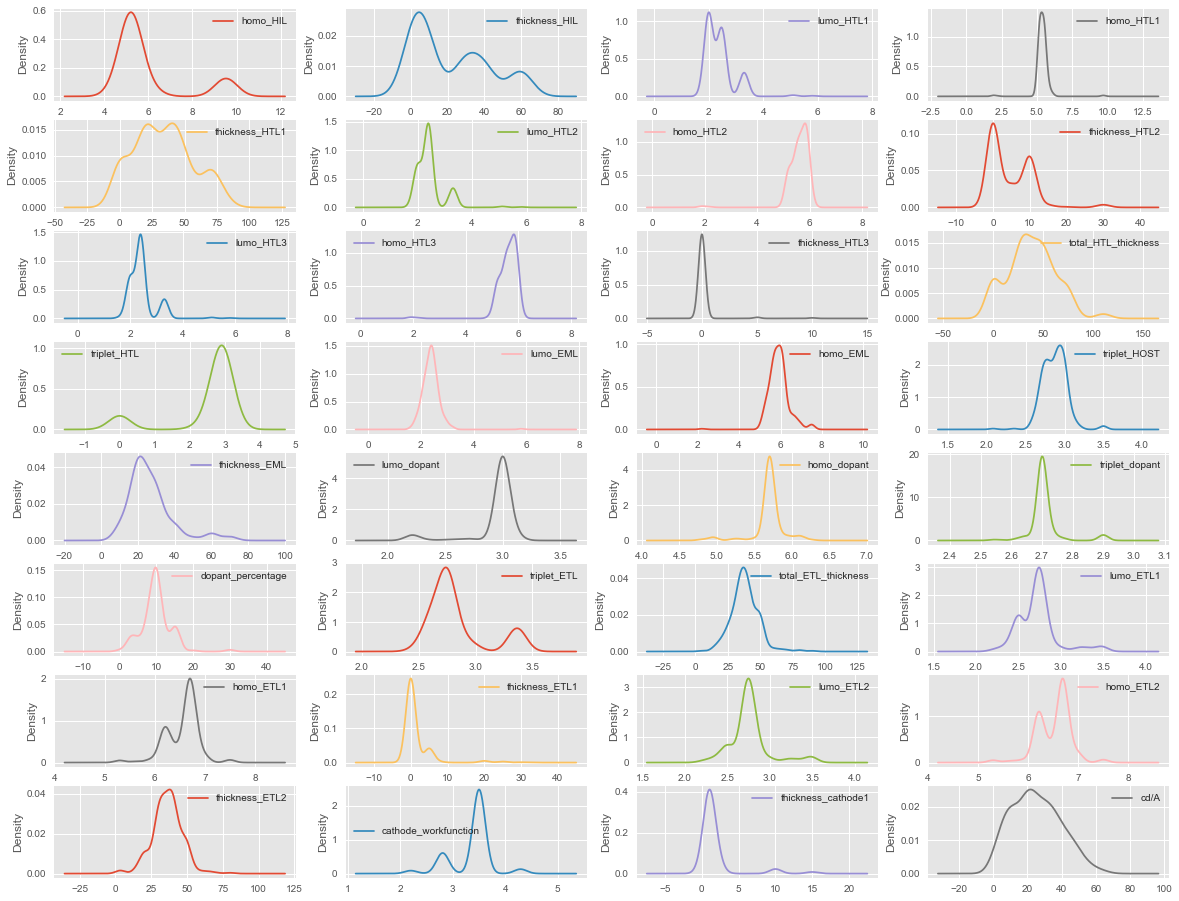

In [4]:
df.plot(kind='density', subplots=True, layout=(8,4), sharex=False, figsize=(20,16));
# plt.savefig('density.png', format='png', dpi=300)

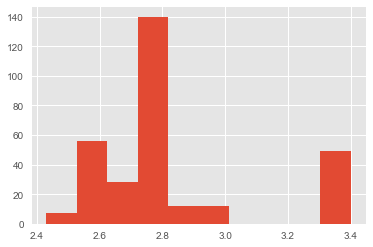

In [5]:
df.triplet_ETL.hist();

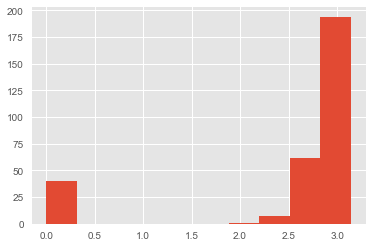

In [6]:
df.triplet_HTL.hist();

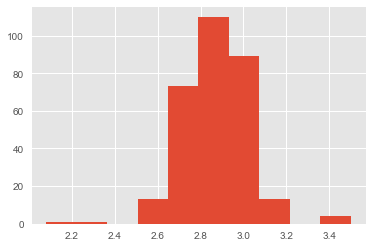

In [7]:
df.triplet_HOST.hist();

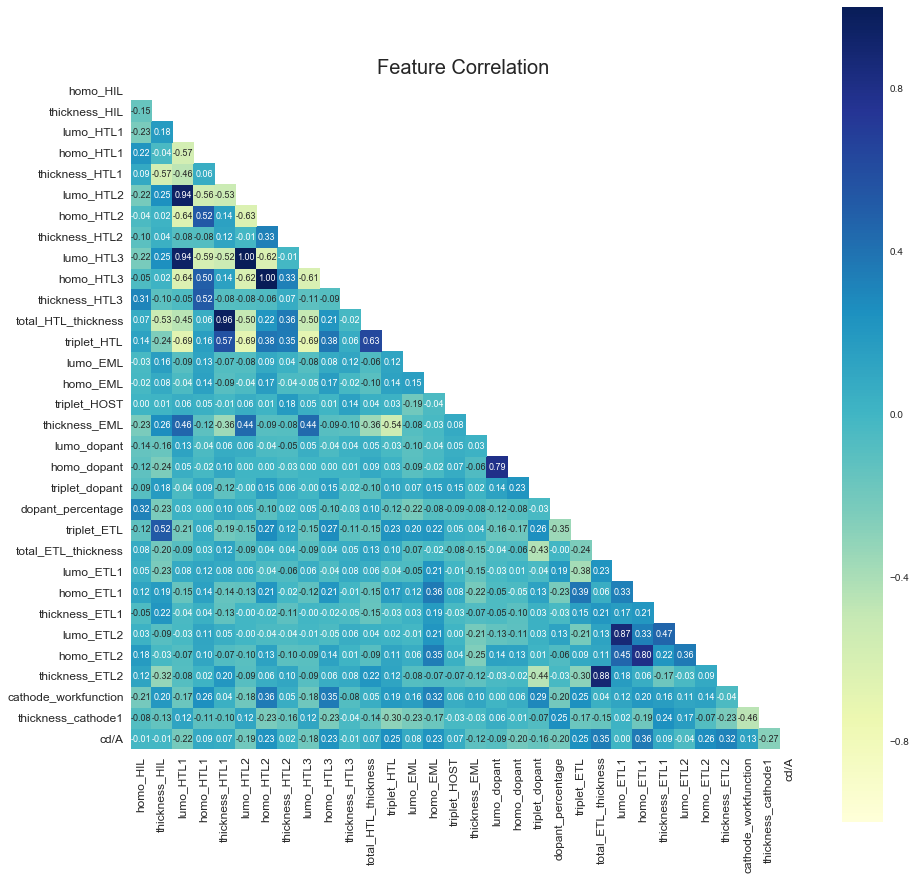

List the features in descending order of their correlation with cd/A:

homo_ETL1:   0.3606665283183362
total_ETL_thickness:   0.3481029232700513
thickness_ETL2:   0.3196567804166687
thickness_cathode1:   -0.2748108280426274
homo_ETL2:   0.2631498775336517
triplet_HTL:   0.2542069536116606
triplet_ETL:   0.24558439563710682
homo_EML:   0.23370810961775598
homo_HTL3:   0.2325681670062592
homo_HTL2:   0.22929046420660773
lumo_HTL1:   -0.21684366869984908
homo_dopant:   -0.20294137867269063
dopant_percentage:   -0.20228600525287246
lumo_HTL2:   -0.1883503997919392
lumo_HTL3:   -0.181172914643011
triplet_dopant:   -0.15562099936119447
cathode_workfunction:   0.13329052244711842
thickness_EML:   -0.11643443441425444
lumo_dopant:   -0.09363982137049219
thickness_ETL1:   0.09098212095764681
homo_HTL1:   0.08675229464200443
lumo_EML:   0.07973528130896682
total_HTL_thickness:   0.07107870135731038
thickness_HTL1:   0.07028024487015966
triplet_HOST:   0.06941397664837212
lumo_ETL2:   -0.04250922

In [8]:
X = df[list(df.columns)[:]]

corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', mask=mask, annot=True, fmt = '.2f', 
                annot_kws={"size":9})
    plt.yticks(rotation=0,fontsize=12)
    plt.xticks(rotation=90,fontsize=12)
    plt.title('Feature Correlation ',fontsize=20)
#     plt.savefig('heatmap.png', format='png', dpi=600)
    plt.show();

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

In [9]:
X = df.iloc[:, :-1]
y = df[['cd/A']]
print(X.shape)
X.head()

(304, 31)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,triplet_ETL,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_cathode1
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

rs = 24

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=rs)

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, LeaveOneOut

regressor = RandomForestRegressor(n_estimators=130, random_state=7)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=rs)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.73407075  0.7441435   0.61429016  0.74449371  0.52222561]
mean R2 score:  0.671844744576 

RMSE mean:  7.50203550724 

R-squared test:  0.730131995523
RMSE:  7.81885386267


In [12]:
# import pickle

# # save the model to disk
# filename = 'C:/Anaconda3/projects/oled/PhOLED 300/rforest_300.sav'
# pickle.dump(regressor, open(filename, 'wb'))

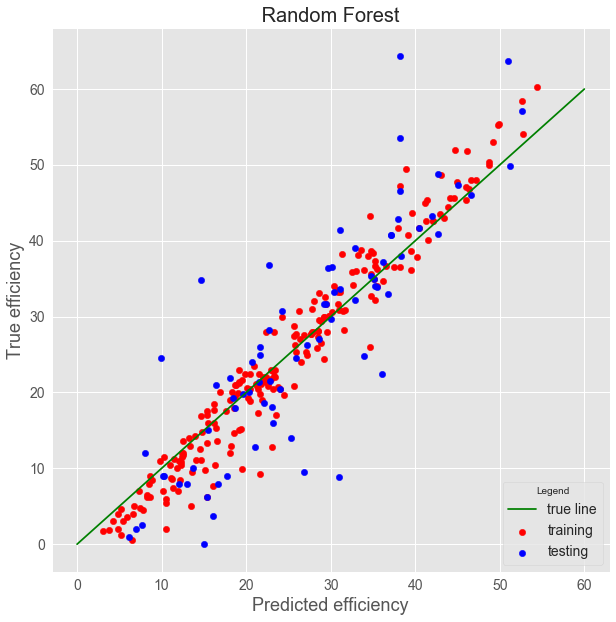

In [13]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [14]:
# # extract points to csv for plotting
# trainplot= pd.DataFrame({'pred_train': pred_train, 'y_train': np.array(y_train).ravel()})
# testplot= pd.DataFrame({'y_predictions': y_predictions, 'y_test': np.array(y_test).ravel()})
# trainplot.to_csv('trainplot.csv')
# testplot.to_csv('testplot.csv')

In [15]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))
importance = [round(float(i), 3) for i in importance]

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

        column              importance
0       triplet_ETL         0.181
1       homo_EML            0.079
2       total_ETL_thickness 0.075
3       triplet_HOST        0.074
4       homo_dopant         0.057
5       triplet_HTL         0.048
6       thickness_HIL       0.042
7       triplet_dopant      0.041
8       lumo_EML            0.036
9       homo_HTL3           0.033
10      thickness_EML       0.03
11      lumo_dopant         0.029
12      homo_HIL            0.027
13      homo_ETL1           0.026
14      homo_HTL1           0.026
15      homo_HTL2           0.025
16      thickness_cathode1  0.024
17      thickness_ETL2      0.022
18      thickness_HTL1      0.02
19      lumo_ETL2           0.016
20      total_HTL_thickness 0.016
21      dopant_percentage   0.015
22      lumo_ETL1           0.014
23      homo_ETL2           0.01
24      thickness_HTL2      0.008
25      lumo_HTL1           0.007
26      cathode_workfunction0.007
27      lumo_HTL3           0.004
28      lumo

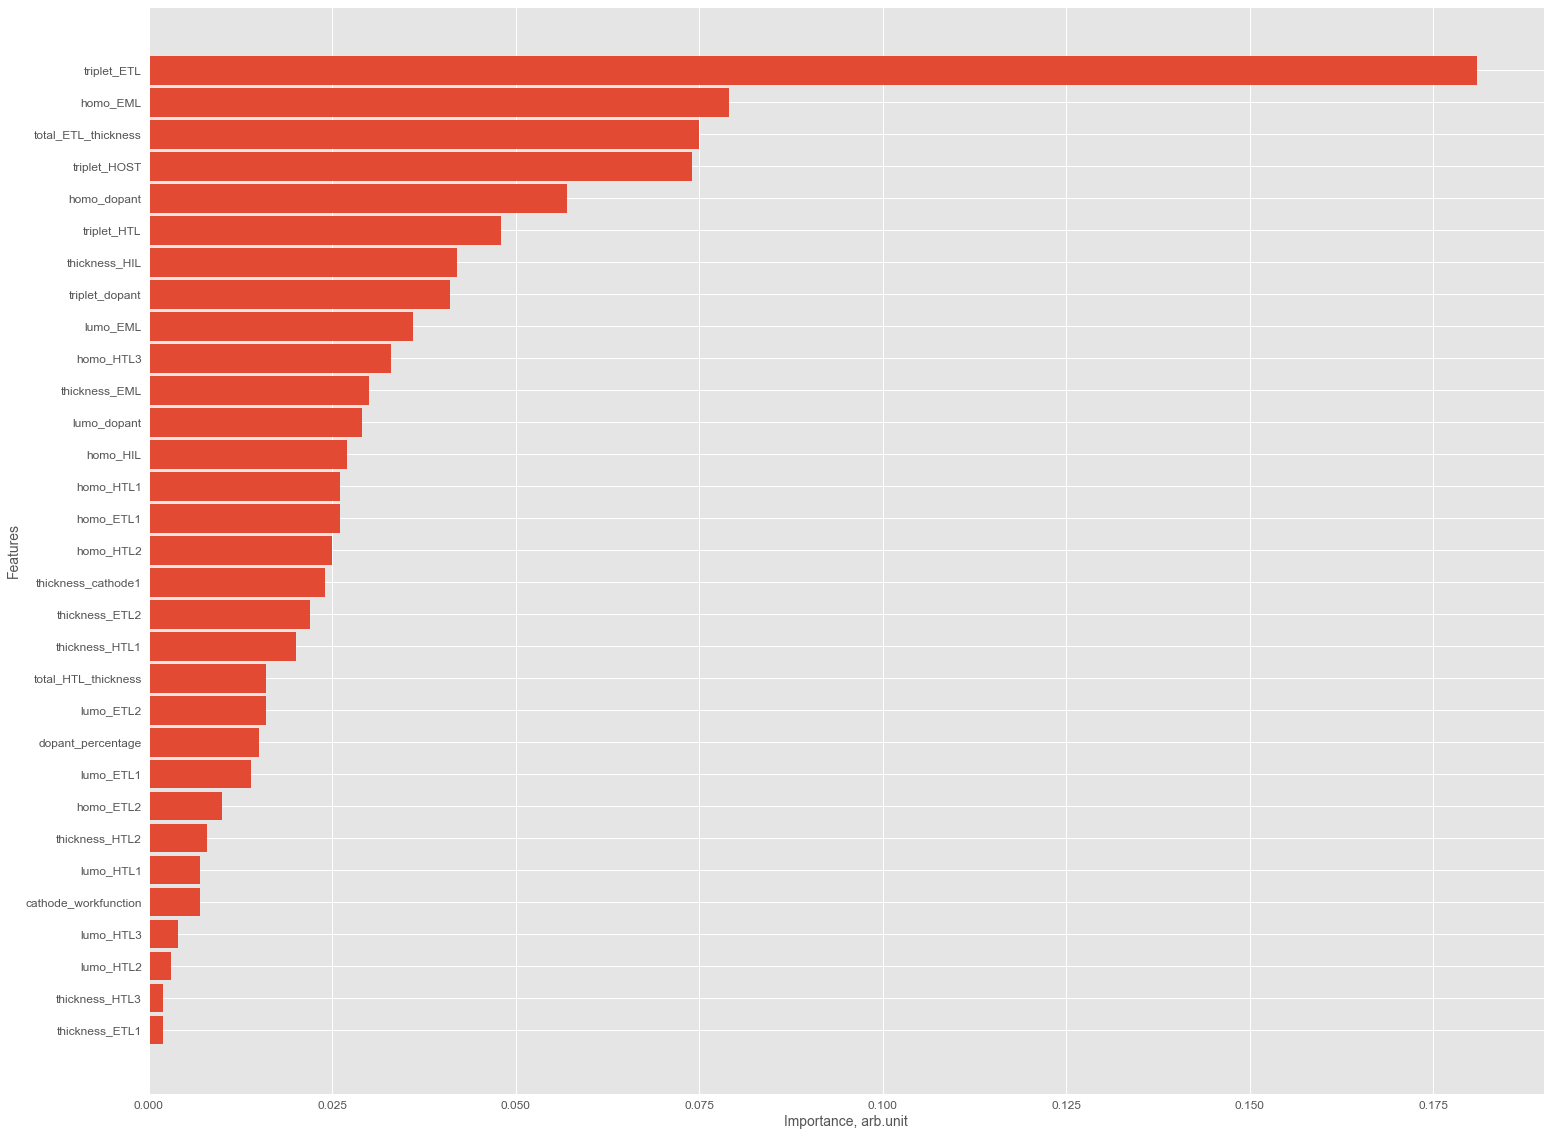

In [16]:
importance, names = zip(*sorted(zip(importance, names), reverse=False))
x = np.arange(X.shape[1])
plt.figure(figsize=(25,20));
fig = plt.barh(x, importance, 0.9, align='center')
plt.xlabel('Importance, arb.unit',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.yticks(x,names,fontsize=12)
plt.xticks( fontsize=12);

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# estimator = list(np.arange(100, 1000, 100))
# parameters = {
#                 'n_estimators': estimator,
#                 'max_depth': [None, 1, 2, 3],
#                 'min_samples_split': [2, 3]
#              }
# regressor = RandomForestRegressor(random_state=2)
# reg = GridSearchCV(regressor, parameters, verbose=1, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1 )

# reg.fit(X_train, y_train.values.ravel())
# print('Best score: %0.3f' % reg.best_score_)
# print('Best parameters set:')
# best_parameters = reg.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print('\t%s: %r' % (param_name, best_parameters[param_name]))

# y_predictions = reg.predict(X_test)
# print('r2 on test set:', r2_score(y_test, y_predictions))

# scores = cross_val_score(reg, X, y.values.ravel(), cv=kfold)
# print('scores: ', -scores)
# print('mean score: ', -scores.mean())

In [18]:
from tpot import TPOTRegressor

# tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2)
# tpot.fit(X_train, y_train.values.ravel())
# print(tpot.score(X_test, y_test))
# tpot.export('C:/Anaconda3/projects/oled/PhOLED 300tpot_pholed_pipeline.py')

## MLP regressor

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [33]:
regressor = MLPRegressor(random_state=12, hidden_layer_sizes=(1000, 500, 100), activation='relu', solver='adam', max_iter=100000)
regressor.fit(X_train_norm, y_train.values.ravel())

y_predictions = regressor.predict(X_test_norm)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test_norm, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.27811867  0.46763108  0.2489282   0.38813166  0.25263943]
mean R2 score:  0.327089810215 

R-squared test:  0.70308918725
RMSE:  8.20125667297


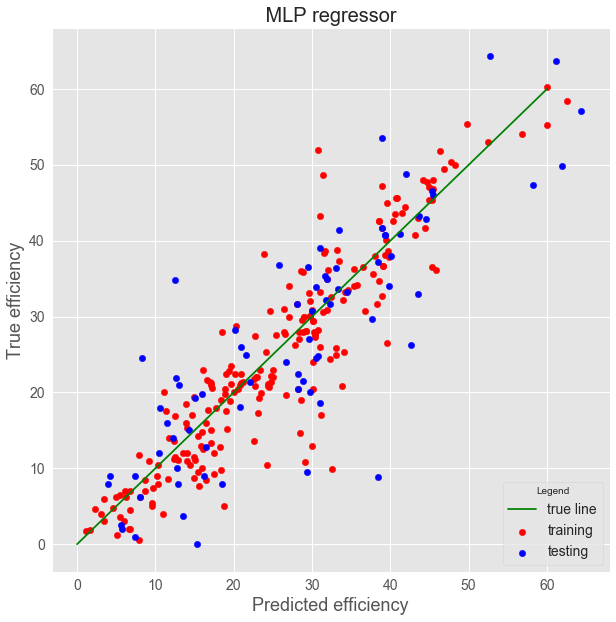

In [34]:
pred_train = regressor.predict(X_train_norm)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' MLP regressor ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
#     'hidden_layer_sizes': [i for i in range(8,24)],
              'activation': ['tanh', 'logistic'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.001],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [100000],
              'early_stopping': [True],
              'warm_start': [False]}

reg = GridSearchCV(regressor, param_grid=param_grid, scoring='neg_mean_squared_error',
                   cv=kfold, verbose=True, pre_dispatch='2*n_jobs')
reg.fit(X_train_norm, y_train.values.ravel())

y_predictions = reg.predict(X_test_norm)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   48.6s finished


In [45]:
# Check how our model is doing on test set
print('R-squared test: ', reg.score(X_test_norm, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R-squared test:  -297.259942921
RMSE:  17.2412279992


## Keras neural network

In [124]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# scaler_y = StandardScaler()
# scaler_y.fit(y_train)

# y_train_norm = scaler_y.transform(y_train)
# y_test_norm = scaler_y.transform(y_test)

In [152]:
# define and fit the final model
def baseline_model():
    model = Sequential()
    model.add(Dense(31, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')    
    return model
    
regressor = KerasRegressor(build_fn=baseline_model, nb_epoch=1000, batch_size=100, verbose=False)

regressor.fit(np.array(X_train), np.array(y_train));

In [153]:
y_predictions = regressor.predict(np.array(X_test))
pred_train = regressor.predict(np.array(X_train))

In [71]:
# r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
# print('R2 scores: ', r2_scores)
# print('mean R2 score: ', r2_scores.mean(), '\n')

# mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# # Check how our model is doing on test set
# print('R-squared test: ', regressor.score(X_test_norm, y_test))
# print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

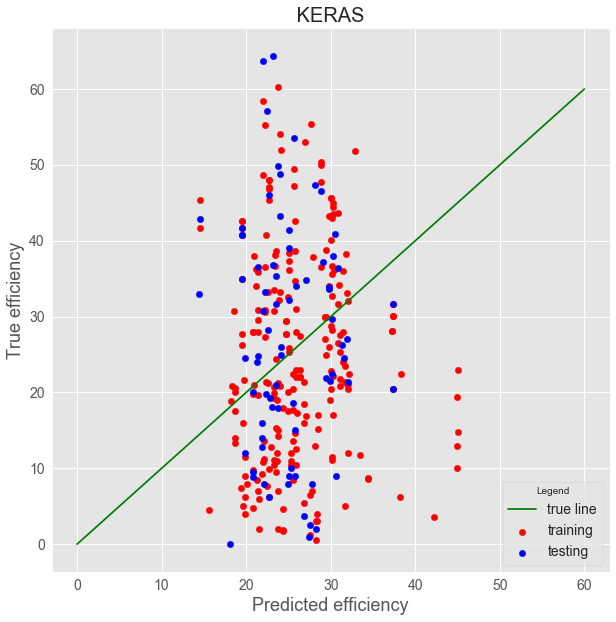

In [156]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' KERAS ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

## XGB

In [119]:
from xgboost import XGBRegressor, plot_importance

regressor = XGBRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


R2 scores:  [ 0.65824263  0.70396053  0.56765917  0.7105675   0.52353529]
mean R2 score:  0.632793024046 

RMSE mean:  8.31409161728 

R-squared test:  0.668349988783
RMSE:  8.66777053147


## Adaboost

In [36]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.54929279  0.43402569  0.55580875  0.24591461  0.35326821]
mean R2 score:  0.427662010814 

RMSE mean:  10.1538104213 

R-squared test:  0.600797300787
RMSE:  9.6389926614
